Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline


Cargar Datos

In [2]:
df_train = pd.read_csv("train.csv")

Análisis Precio de Ventas - Una Variable

In [3]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* Gráfica de Distribución

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

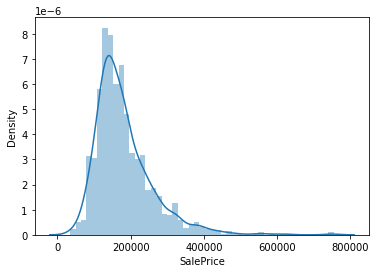

In [4]:
sns.distplot(df_train["SalePrice"])

* No es normal, ya que no es una campana enfocada en el centro.
* Acumulada hacia la izquierda, con cola a la derecha. 
* "Curtosis" no se encuentra bien distribuido. 

# Skewnes

In [5]:
df_train["SalePrice"].skew()

1.8828757597682129

# Curtosis

In [6]:
df_train["SalePrice"].kurt()

6.536281860064529

¡¡IMPORTANTE SE COMPARAN DOS VARIABLES NUMÉRICAS!!
¡¡USAR GRÁFICOS DE DISPERSIÓN!!

Relaciones Categóricas. 
* Área de Vivienda
* Área de Sótano
    * "SalePrice" es nuestra variable objetivo. 

In [7]:
var = "GrLivArea"

In [14]:
data = pd.concat([df_train["SalePrice"],df_train["GrLivArea"]],axis=1)

In [22]:
data["SalePrice"].max()

755000

Creamos una gráfica a partir del nuevo dataframe construido.
El gráfico es uno de dispersión

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

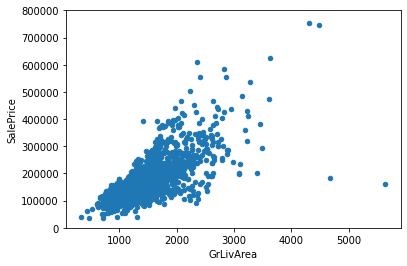

In [20]:
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000))

* Se percibe una relación que tiende un poco a ser lineal
* Entonces a mayor espacio habitable, es muy posible que el precio se eleve
* Existen datos anómalos que puedan darse por características poco comunes
* Ejemplo: Una vivienda muy espaciosa pero ubicada en una zona marginal

Repetimos el Paso con la siguiente variable - "Sotano"

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

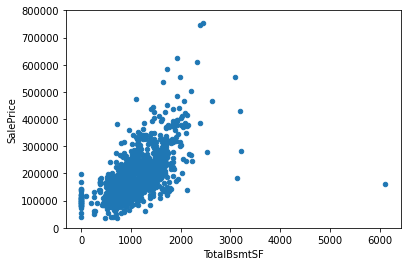

In [30]:
#Nombramos una variable con el valor independiente
var_inde = "TotalBsmtSF"
#Creamos un nuevo dataframe
    #Columna 1: Variable dependiente, Columna 2: Variable independiente. 
data = pd.concat([df_train["SalePrice"],df_train[var_inde]],axis=1)
#Creamos un gráficos de dispersion. 
#Colocamos el nombre del apartado tanto en X & Y, agregamos un limite a y.
#Suele ser de 0 a un máximo de la variable dependiente. 
data.plot.scatter(x = var_inde,y="SalePrice",ylim=(0,800000))

* La relación no suele ser tan lineal como la anterior
* De igual forma parece que hay hogares con un sotano no tan amplio pero con un precio muy alto. 
* Auque al final si puede ser un dato a considerar. 
* Relación Muy Empinada

Relación de Variable Numérica ["SalePrice"] & variables no numéricas ["Categóricas]

* Construimos nuestra gráfica de bigotes o boxplot

In [31]:
#Esta es una variable categórica
var = "OverallQual"

In [33]:
#Concatenamos dos columnas, Precio de Venta y Calidad
data = pd.concat([df_train["SalePrice"],df_train[var]],axis=1)

* MatplotLib + Seaborn

(-0.5, 9.5, 0.0, 800000.0)

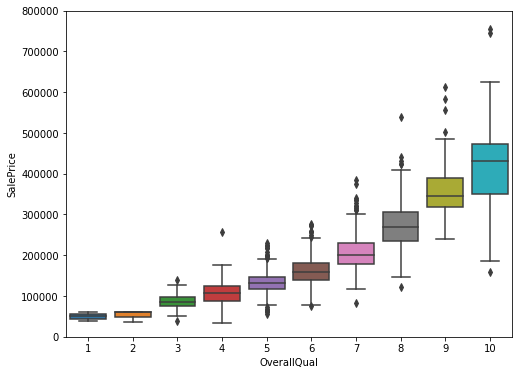

In [37]:
#Definimos figura de entorno de trabajo. 
f,ax = plt.subplots(figsize = (8,6))
#Preparando la grafica real - boxsplot, data = "dataframe"
figura = sns.boxplot(x=var, y="SalePrice",data = data)
#Definimos el Rango de nuestra gráfica - Variable Dependiente. 
figura.axis(ymin=0,ymax=800000)

¿Qué observamos de esta variable categórica enfrentada a una numérica?

* La Calidad es muy importante y define el precio como lo podemos ver. 
* Sin embargo tambien existe un ensanchamiento constante de las cajas, eso nos dice que mientras mas calidad, existe una disparidad de precios.
* Por ejemplo casas con calidad de 10 tienen un precio muy fluctuante ¿Por Qué? 

¿Cómo se relaciona precio de venta con el año de construcción?

In [38]:
var = "YearBuilt"

In [40]:
data = pd.concat([df_train["SalePrice"],df_train[var]],axis=1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

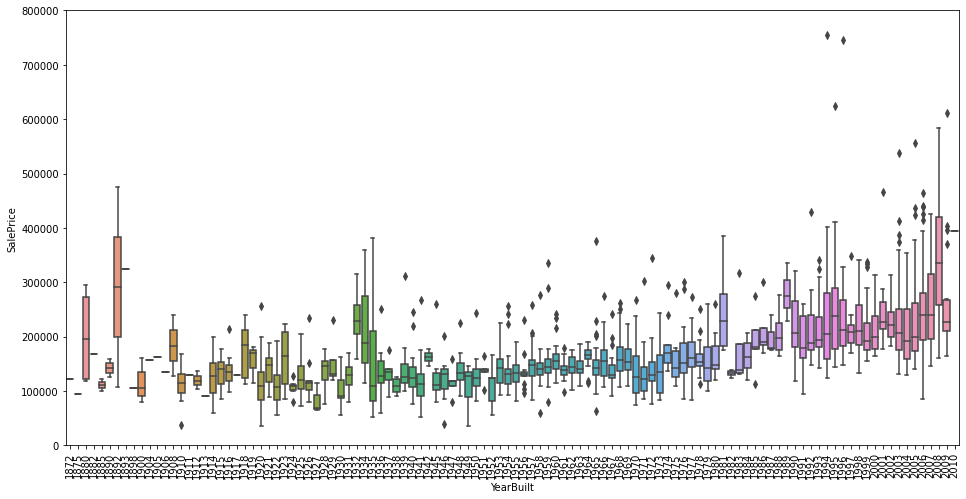

In [45]:
#Campo de trabajo - gráfico más largo.
f,ax = plt.subplots(figsize=(16,8))
#Creacion de grafico de bigote
figura = sns.boxplot(x=var,y="SalePrice",data=data)
#Delimitar el rango - variable dependiente
figura.axis(ymin=0,ymax=800000)
#Rotal las etiquetas en x 90 grados. 
plt.xticks(rotation=90)

* Leve tendencia lineal positiva
* Algunas casas antiguas disponen de un gran precio. Posiblemente por valor histórico. 
* Aunque una concentración normal en el precio se da ante casas mucho más modernas. 
* No es una tendencia muy fuerte. 


Tenemos Muchísimas variables, esto podría jugar en contra ante las variables que nuestra "Intuición" pudo captar. 

# Confirmar nuestra Intuición

In [48]:
#Matriz de correlación - numérica
corrmat = df_train.corr()

<AxesSubplot:>

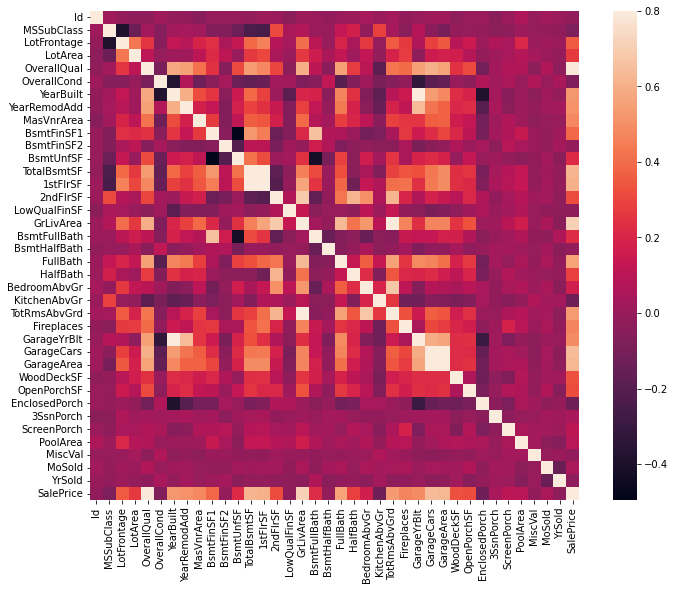

In [50]:
#Armamos nuestro gráfico. 
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(data=corrmat,vmax=.8,square=True) #Mientras mas claro, mas correlacionado. 

* Overall Quall
* TotalBSMTSF
* GRLiveArea
* GarageArea - Nueva Variable descubierta. 
* FullBath

Nuevo HeatMap - Variables Top 10 con mayor correlación. 

In [74]:
k = 10

In [75]:
#Lista conformada por las Variables mas correlacionadas con "SalePrice" cuantas? k - variables
cols = corrmat.nlargest(k,"SalePrice")["SalePrice"].index

In [76]:
#Matriz de Correlación Resumida - Solo tenemos valores
cm = np.corrcoef(df_train[cols].values.T)

# Graficamos

In [77]:
sns.set(font_scale = 1.10)

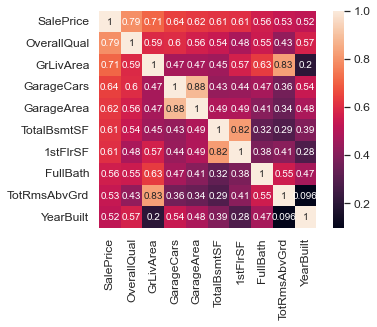

In [84]:

hm = sns.heatmap(data=cm,cbar=True,annot=True,square=True,
yticklabels=cols.values, xticklabels=cols.values,annot_kws={"size":10}
)

* Que variables más influyen en Precio de Venta?
    * La Calidad - OverallQual
    * Seguida por el Área vivible - GrLivArea
    * Impresionante, tambien el área del garage. 
    * Por otro lado tambien el Sótano
    * Y también podría ser el baño?

* Caso interesante entrew GarageCars y GarageArea
    + ¿Por qué incluir ambas? existe colinealidad... 
    * Entonces si una crece, es imposible que la otra no. 
    * Estas variables estás muy correlacionadas... 
* Del mismo modo:
    * La variable area del primer piso está correlacionada con el área del sótano, por lo que incluimos a la de mayor correlación en un modelo. 
* Igual con la variable TotRMSABVGRD & GrLivArea.


Gráficos de Dispersión contra las variables más correlacionadas

In [85]:
sns.set()

¡Recuerda quitar las variables correlacionadas entre sí!

In [86]:
cols = ["SalePrice","OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt"]

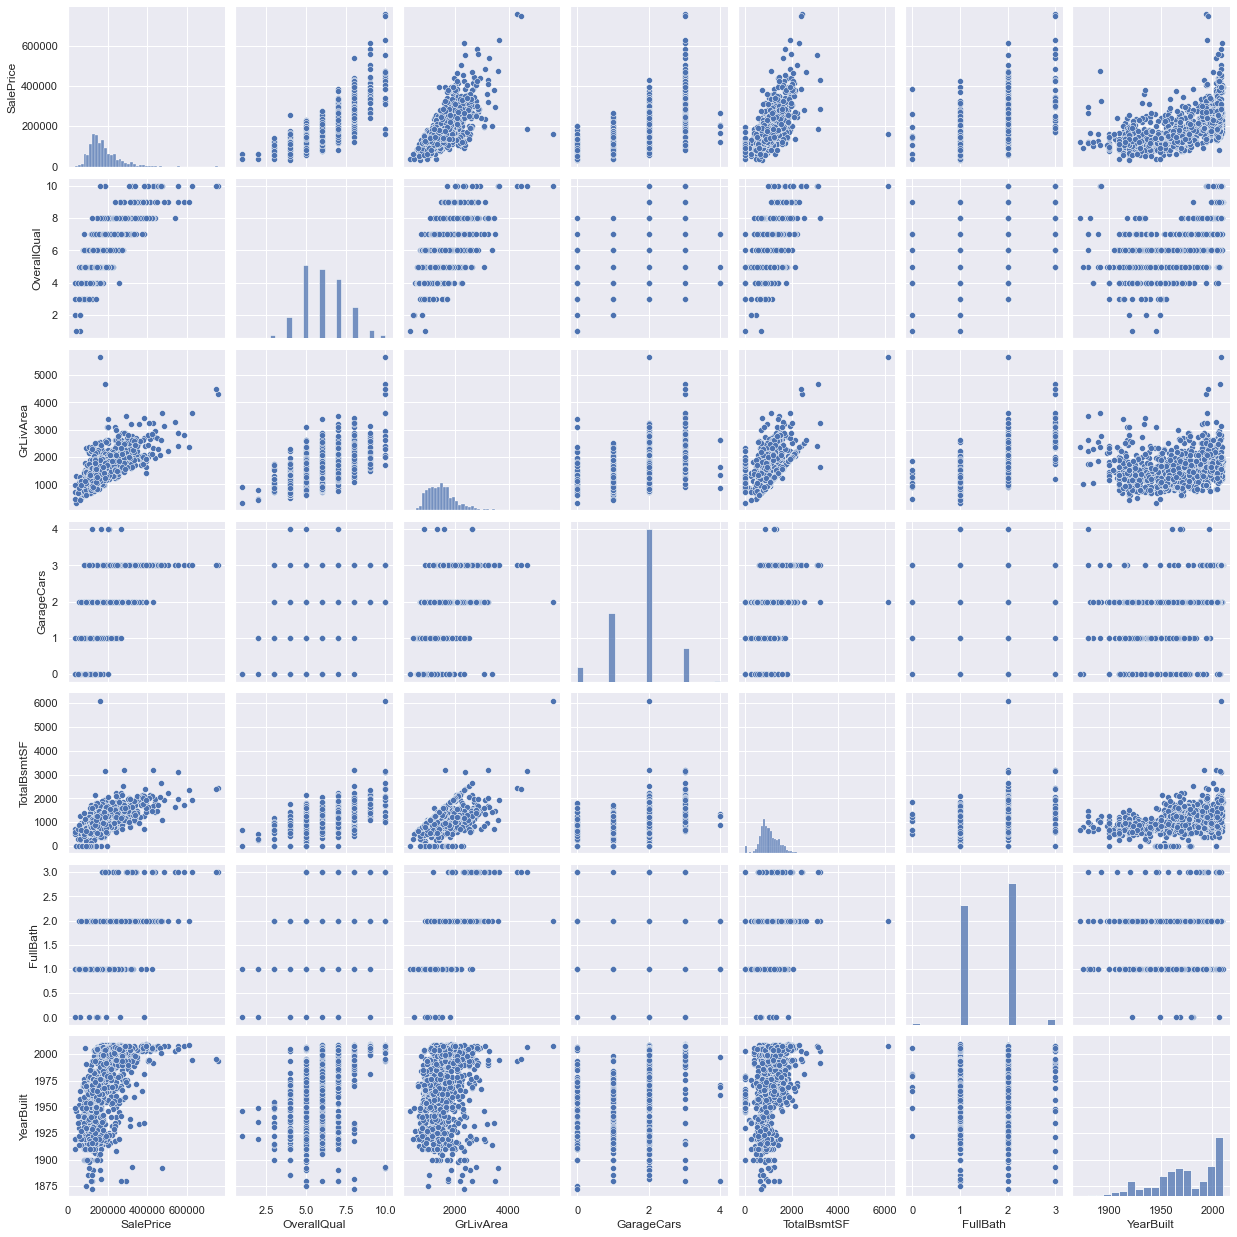

In [90]:
sns.pairplot(df_train[cols],height=2.5)
plt.show()

* Estos gráficos suelen hacerse para confirmas las tendencias de nuestra matriz de correlación resumida. 